In [1]:
import numpy as np
from pathlib import Path
from production import Problem, ExactSolver
from production.utils import get_mean_err
import matplotlib.pyplot as plt

In [2]:
local_experiment_path = Path("../data/local_n_J_x_J_z_T")
vertex_experiment_path = Path("../data/vertex_n_J_x_J_z_T")
loop_experiement_path = Path("../data/loop_n_J_x_J_z_T")

In [3]:
local_energies = np.load(local_experiment_path / "energies.npy")
vertex_energies = np.load(vertex_experiment_path / "energies.npy")
loop_energies = np.load(loop_experiement_path / "energies.npy")

In [4]:
ms = [2, 4, 6, 8, 10, 12]
problems = [Problem(n_sites=8, J_x=2.2, J_z=1.0, temperature=1.0, m=m) for m in ms]

In [5]:
delta_taus = [pb.delta_tau for pb in problems][::-1]
mean_local_energies, err_local_energies = get_mean_err(local_energies, True)
mean_vertex_energies, err_vertex_energies = get_mean_err(vertex_energies, True)
mean_loop_energies, err_loop_energies = get_mean_err(loop_energies, True)

In [6]:
solver = ExactSolver(problems[0])

In [7]:
n_spins_up = problems[0].n_sites - len(range(0, problems[0].n_sites, 2))
specific_energy = solver.compute(solver.H, n_spins_up)

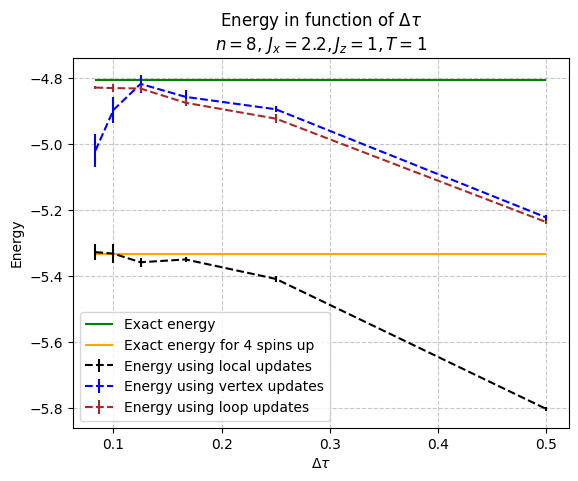

In [8]:
fig, ax = plt.subplots()
ax.set_title(r"Energy in function of $\Delta\tau$"
             "\n"
             r"$n=8, \, J_x=2.2, J_z=1, T=1$")
ax.hlines(
    solver.energy.real,
    min(delta_taus),
    max(delta_taus),
    color="green",
    label="Exact energy",
)
ax.hlines(
    specific_energy.real,
    min(delta_taus),
    max(delta_taus),
    color="orange",
    label=f"Exact energy for {n_spins_up} spins up",
)
ax.errorbar(delta_taus, mean_local_energies, err_local_energies, linestyle="dashed", label="Energy using local updates", color="black")
ax.errorbar(delta_taus, mean_vertex_energies, err_vertex_energies, linestyle="dashed", label="Energy using vertex updates", color="blue")
ax.errorbar(delta_taus, mean_loop_energies, err_loop_energies, linestyle="dashed", label="Energy using loop updates", color="brown")
ax.set_xlabel(r"$\Delta\tau$")
ax.set_ylabel("Energy")
ax.legend(loc="lower left")
ax.grid(linestyle='--', alpha=0.7)
fig.savefig(Path("../figures/energies.pdf"))
plt.show()

In [ ]:
local_times = np.load(local_experiment_path / "times.npy")
vertex_times = np.load(vertex_experiment_path / "times.npy")
loop_times = np.load(loop_experiement_path / "times.npy")

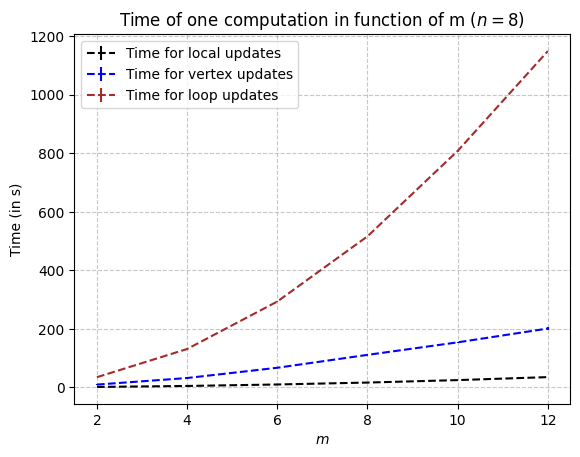

In [14]:
fig, ax = plt.subplots()
ax.set_title("Time of one computation in function of m ($n=8$)")
ax.errorbar(ms, np.mean(local_times, axis=1), np.std(local_times, axis=1) / np.sqrt(10), linestyle="dashed", label="Time for local updates", color="black")
ax.errorbar(ms, np.mean(vertex_times, axis=1), np.std(vertex_times, axis=1) / np.sqrt(10), linestyle="dashed", label="Time for vertex updates", color="blue")
ax.errorbar(ms, np.mean(loop_times, axis=1), np.std(loop_times, axis=1) / np.sqrt(10), linestyle="dashed", label="Time for loop updates", color="brown")
ax.set_xlabel(r"$m$")
ax.set_ylabel("Time (in s)")
ax.legend(loc="upper left")
ax.grid(linestyle='--', alpha=0.7)
fig.savefig(Path("../figures/timings.pdf"))
plt.show()